<a href="https://colab.research.google.com/github/isam-19/Herramientas-de-Analitica-Empresarial-para-Operaciones/blob/main/Aprende_mejora_u3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDE Y MEJORA CONSTRUCCIÓN Y MANIPULACIÓN DE CONJUNTOS DE DATOS UNIDAD 3


In [3]:
from google.colab import files
uploaded_csv = files.upload()

Saving DatosEmpresas.csv to DatosEmpresas.csv


In [4]:
import pandas as pd

# Cargar y leer el archivo CSV desde Colab
df_csv = pd.read_csv('DatosEmpresas.csv')

In [5]:
# Verificación de la correcta carga de los datasets
# Ver las primeras filas del dataset para revisar sus estructuras

print("Primeras filas del CSV:")
print(df_csv.head())

Primeras filas del CSV:
   Unnamed: 0                Empresa  Cumplimiento  Impacto_social  \
0           1       TechNova Systems            87              70   
1           2  Constructora DelValle            67              84   
2           3  AgroIndustrial Pampas            96              42   
3           4    Finanzas Seguras SA            71              91   
4           5       MediHealth Group            98              57   

   Impacto_economico  Impacto_ambiental  Participacion_externa  Recursos  \
0                 74                 70                     30        77   
1                 76                 72                     64        58   
2                 66                 70                     77        69   
3                 86                 90                     66        73   
4                 85                 67                     38        70   

   Oficina_proyectos  
0                  1  
1                  0  
2                  0  
3     

*`Paso 1. Determina el modelo de regresión lineal múltiple, tomando como variable dependiente “Impacto Ambiental” y como variables independientes “Impacto Económico”, “Cumplimiento”, “Participación externa”, “Recursos” e “Impacto Social”.`*

In [7]:
import statsmodels.api as sm

# Variables independientes y dependiente
X = df_csv[['Impacto_economico', 'Cumplimiento', 'Participacion_externa', 'Recursos', 'Impacto_social']]
y = df_csv['Impacto_ambiental']

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
modelo_lineal = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:      Impacto_ambiental   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     6.460
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000139
Time:                        00:56:48   Log-Likelihood:                -179.57
No. Observations:                  50   AIC:                             371.1
Df Residuals:                      44   BIC:                             382.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.95

*`Paso 2. Determina el modelo de regresión logística, tomando como variable dependiente “Oficina de Proyectos” y como variables independientes “Impacto Económico”, “Cumplimiento”, “Participación externa”, “Recursos”, “Impacto Social” e “Impacto Ambiental”.`*

In [8]:
X_log = df_csv[['Impacto_economico', 'Cumplimiento', 'Participacion_externa', 'Recursos', 'Impacto_social', 'Impacto_ambiental']]
y_log = df_csv['Oficina_proyectos']

# Agregar constante
X_log = sm.add_constant(X_log)

# Ajustar modelo
modelo_log = sm.Logit(y_log, X_log).fit()

# Mostrar resultados
print(modelo_log.summary())

Optimization terminated successfully.
         Current function value: 0.613721
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      Oficina_proyectos   No. Observations:                   50
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                 0.09786
Time:                        01:16:30   Log-Likelihood:                -30.686
converged:                       True   LL-Null:                       -34.015
Covariance Type:            nonrobust   LLR p-value:                    0.3537
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4995      4.028     -1.862      0.063     -15.394       0.

*`Paso 3. Realiza el análisis de agrupación por medio de la definición de los clústeres a conformar de las empresas. Determina el modelo de cada uno de los clústeres identificados.`*

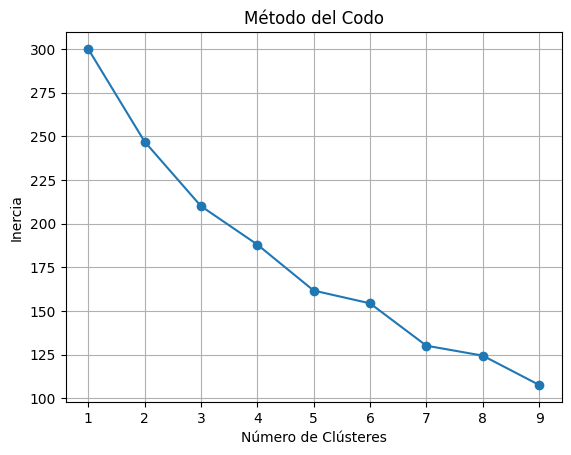

In [9]:
# Paso 3: Clustering con KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalar datos
variables_cluster = df_csv[['Impacto_economico', 'Cumplimiento', 'Participacion_externa', 'Recursos', 'Impacto_social', 'Impacto_ambiental']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(variables_cluster)

# Método del codo
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    inertia.append(km.inertia_)

# Gráfica del codo
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [13]:
# Ajustar modelo KMeans con número óptimo (3)
kmeans = KMeans(n_clusters=3, random_state=0)
df_csv['Cluster'] = kmeans.fit_predict(scaled_data)

# Ver empresas por clúster, excluyendo la columna 'Empresa'
display(df_csv.drop('Empresa', axis=1).groupby('Cluster').mean())

,Unnamed: 0,Cumplimiento,Impacto_social,Impacto_economico,Impacto_ambiental,Participacion_externa,Recursos,Oficina_proyectos
Cluster,,,,,,,,
0,23.000000,73.846154,83.384615,87.153846,75.769231,54.846154,64.461538,0.538462
1,25.958333,80.875000,61.125000,71.458333,60.958333,52.708333,52.166667,0.250000
2,27.153846,86.461538,71.000000,70.769231,76.384615,32.384615,75.000000,0.615385


*`Paso 4. De cada uno de los clústeres anteriormente definidos, determina el modelo de regresión lineal múltiple, teniendo en cuenta las mismas variables del Paso 1. Finalmente, realice una comparación de si existe diferencia significativa frente a agrupar o no.`*

In [14]:
for c in df_csv['Cluster'].unique():
    print(f'\n--- Modelo Clúster {c} ---')
    sub_df = df_csv[df_csv['Cluster'] == c]
    X_sub = sub_df[['Impacto_economico', 'Cumplimiento', 'Participacion_externa', 'Recursos', 'Impacto_social']]
    y_sub = sub_df['Impacto_ambiental']
    X_sub = sm.add_constant(X_sub)
    modelo_sub = sm.OLS(y_sub, X_sub).fit()
    print(modelo_sub.summary())


--- Modelo Clúster 2 ---
                            OLS Regression Results                            
Dep. Variable:      Impacto_ambiental   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     2.263
Date:                Sat, 14 Jun 2025   Prob (F-statistic):              0.158
Time:                        02:04:45   Log-Likelihood:                -40.430
No. Observations:                  13   AIC:                             92.86
Df Residuals:                       7   BIC:                             96.25
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)
